# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.xlsx`
- `startup_funding2020.xlsx`
- `startup_funding2021.xlsx`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import requests  
from bs4 import BeautifulSoup 

In [2]:
df_2019 = pd.read_excel('data/startup_funding2019.xlsx')
df_2020 = pd.read_excel('data/startup_funding2020.xlsx')
df_2021 = pd.read_excel('data/startup_funding2021.xlsx')

In [3]:
df_2019['Year']= 2019
df_2020['Year']= 2020
df_2021['Year']= 2021

In [4]:
fnd = pd.concat([df_2019, df_2020, df_2021])
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [5]:
fnd.shape

(2343, 10)

In [6]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 201.4+ KB


2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [7]:
fnd.Founded.unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, 2020, 1998, 2007, 1982,
       2009, 1995, 2006, 1978, 1999, 1994, 2005, 1973, '-', 2002, 2001,
       2021, 1993, 1989, 2000, 2003, 1991, 1984, 1963], dtype=object)

In [8]:
fnd["Founded"] = fnd["Founded"].fillna(0)
fnd['Founded']= fnd['Founded'].replace("\D+","0",regex=True).astype('int32')

In [9]:
fnd.Founded.unique()

array([   0, 2014, 2004, 2013, 2010, 2018, 2019, 2017, 2011, 2015, 2016,
       2012, 2008, 2020, 1998, 2007, 1982, 2009, 1995, 2006, 1978, 1999,
       1994, 2005, 1973, 2002, 2001, 2021, 1993, 1989, 2000, 2003, 1991,
       1984, 1963])

In [10]:
fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '', regex=True)
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',', '', regex=True)
fnd['Amount($)'] = fnd['Amount($)'].str.replace('Undisclosed', '0', regex=True)
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'])

In [11]:
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,0,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [12]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2343 non-null   int32  
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      2210 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 192.2+ KB


In [13]:
fnd['Amount($)'].sum()

271543633855.83002

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [14]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head()

,Investor,size
696,Inflection Point Ventures,36
1623,Venture Catalysts,32
993,Mumbai Angels Network,17
162,Angel investors,15
1591,Undisclosed,13


In [15]:
fnd[fnd['Year']==2020].groupby(by=['Investor'],as_index=False).size().sort_values('size', ascending=False).head()

,Investor,size
789,Venture Catalysts,20
484,Mumbai Angels Network,12
85,Angel investors,12
334,Inflection Point Ventures,11
769,Undisclosed,10


In [16]:
# "Inflection Point Ventures" ranked 3th position

4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [17]:
sps = pd.read_excel('data/Software Professionals Salary.xlsx')
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [18]:
sps_loc = sps.groupby('Location',as_index=False)[['Rating', 'Salary']].mean()
sps_loc

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632
9,Pune,3.886082,690476.311153


In [19]:
fnd_loc = fnd[fnd['Year']==2021].groupby('HeadQuarter', as_index=False).agg({'Company/Brand':'count', 'Amount($)': 'sum'})
fnd_loc

,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10
...,...,...,...
64,The Nilgiris,1,2.000000e+05
65,Thiruvananthapuram,1,0.000000e+00
66,Trivandrum,1,3.000000e+05
67,Vadodara,1,1.000000e+07


In [20]:
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')
sps_fnd_loc

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,Bangalore,425,1.432742e+10
1,Chennai,3.902726,584559.661513,Chennai,40,7.171400e+08
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,2.439600e+08
3,Jaipur,3.940741,629135.802469,Jaipur,11,3.433000e+08
4,Kolkata,4.024719,710925.573034,Kolkata,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,Mumbai,200,1.538293e+11
6,New Delhi,3.943415,658756.735632,New Delhi,143,1.673010e+09
7,Pune,3.886082,690476.311153,Pune,46,5.090700e+08


In [21]:
 sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)

In [22]:
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000

In [23]:
sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)

In [24]:
sps_fnd_loc = sps_fnd_loc.rename(columns={"Location":"City",
                                          "Rating":"Avg. Rating",
                                         "Salary":"Avg. Salary",
                                         "Company/Brand":"Nr. Companies Funded",
                                         "Amount($MM)":"Sum Funding ($MM)"})

In [25]:
sps_fnd_loc.head()

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00


In [26]:
sps_fnd_loc.sort_values(by='Avg. Rating',ascending=False).head(1)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,4.024719,710925.573034,5,28.0


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

In [27]:
plt.style.use('seaborn')

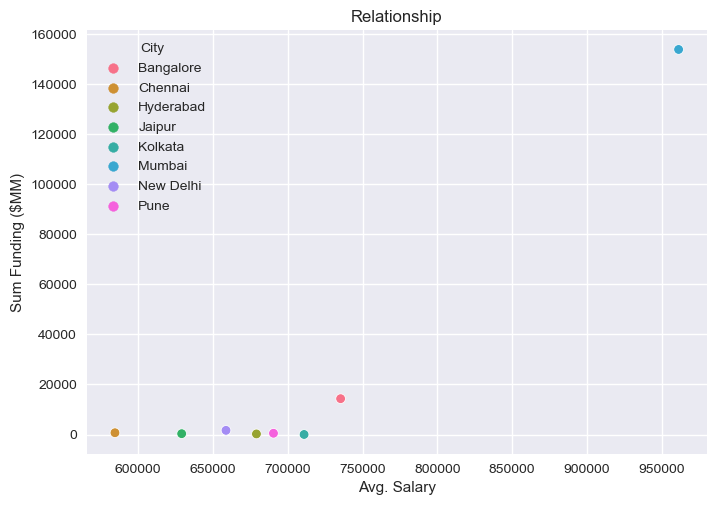

In [28]:
sns.scatterplot(x='Avg. Salary', y='Sum Funding ($MM)', hue='City', data=sps_fnd_loc).set(title='Relationship',
                                                                                          xlabel='Avg. Salary', 
                                                                                          ylabel='Sum Funding ($MM)')
plt.legend(loc='upper left', title='City')

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

In [29]:
url = 'https://www.census2011.co.in/city.php'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')

In [30]:
df = pd.read_html(str(table))[0]
df["Population"] = pd.to_numeric(df["Population"])
df["Literacy"] = pd.to_numeric(df["Literacy"])

In [31]:
df

,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,2,Delhi,Delhi,11034555,16314838,876,87.59
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...,...
493,494,Gangtok,Sikkim,100286,100286,912,89.33
494,495,Datia,Madhya Pradesh,100284,100284,900,80.56
495,496,Nagda,Madhya Pradesh,100039,100039,947,80.71
496,497,Banswara,Rajasthan,99969,101177,960,85.72


In [32]:
l = df.groupby('City',as_index=False)['Literacy'].sum()

In [33]:
l.sort_values(by='Literacy', ascending=False).head()

,City,Literacy
34,Aurangabad,173.52
9,Aizawl,98.36
273,Kochi,97.36
464,Thrissur,97.06
280,Kozhikode,96.53


In [34]:
sps_fnd_loc_lit = pd.merge(df, sps_fnd_loc, on='City')

In [35]:
sps_fnd_loc_lit

,#,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73,3.881709,961180.368491,200,153829.30
1,3,Bangalore,Karnataka,8443675,8499399,923,88.71,3.920232,735344.739593,425,14327.42
2,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26,3.914484,679099.157376,34,243.96
3,6,Chennai,Tamil Nadu,4646732,8696010,989,90.18,3.902726,584559.661513,40,717.14
4,7,Kolkata,West Bengal,4496694,14112536,908,86.31,4.024719,710925.573034,5,28.00
5,9,Pune,Maharashtra,3124458,5049968,948,89.56,3.886082,690476.311153,46,509.07
6,10,Jaipur,Rajasthan,3046163,3046163,900,83.33,3.940741,629135.802469,11,343.30


In [36]:
x = sps_fnd_loc_lit['Literacy']
y = sps_fnd_loc_lit['Avg. Salary']
sizes = sps_fnd_loc_lit ['Population']*0.001

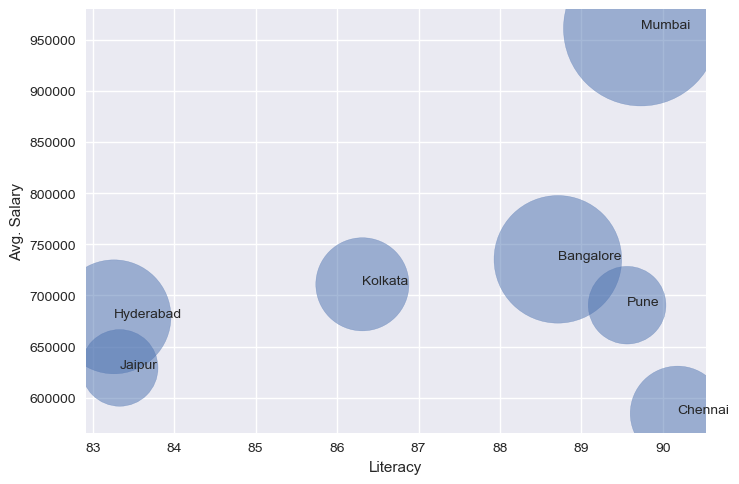

In [37]:
plt.scatter(x, y, s=sizes, alpha=0.5)
label= sps_fnd_loc_lit['City']
plt.xlabel('Literacy')
plt.ylabel('Avg. Salary')

for label, x, y, in zip(label, x, y):
    plt.annotate(label, xy=(x, y))
    
plt.show()

### Esercizio Bonus come Script

    RankPop    City    State Population Metropolitan Sexratio Literacy
150     151  Aizawl  Mizoram    293,416      293,416     1025    98.36


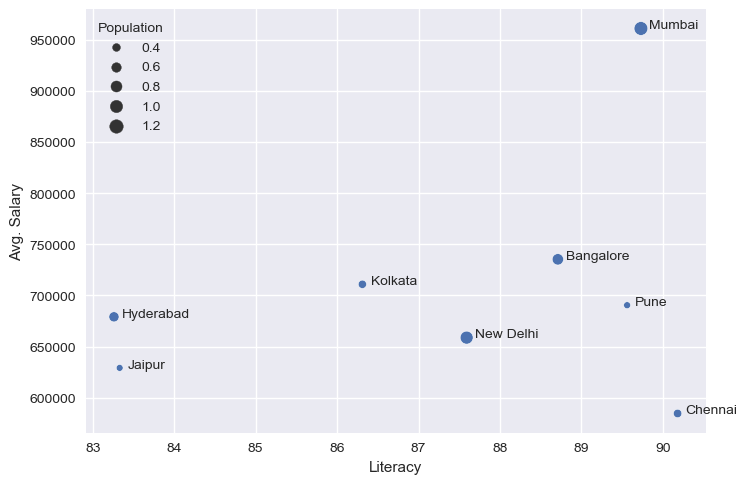

In [38]:
import requests
from bs4 import BeautifulSoup


url = "https://www.census2011.co.in/city.php"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

results = soup.find_all("tbody")[0]

cities = pd.DataFrame([], columns=['RankPop','City','State','Population','Metropolitan','Sexratio','Literacy'])

for rows in results.find_all("tr"): 
    row = [el.text for el in rows.find_all("td")]
    row_loc = int(row[0])-1
    cities.loc[row_loc] = row


# 6A
print(cities[cities.Literacy==cities.Literacy.max()])

# 6B
cities['City'] = cities['City'].replace('Delhi', 'New Delhi')

sps_fnd_loc_lit = sps_fnd_loc.merge(cities[['City', 'Population', 'Literacy']], how='inner', on='City')
sps_fnd_loc_lit

sps_fnd_loc_lit['Population'] = sps_fnd_loc_lit['Population'].str.replace(',','', regex=False)
sps_fnd_loc_lit['Population'] = pd.to_numeric(sps_fnd_loc_lit['Population'])

sps_fnd_loc_lit['Literacy'] = sps_fnd_loc_lit['Literacy'].str.replace(',','', regex=False)
sps_fnd_loc_lit['Literacy'] = pd.to_numeric(sps_fnd_loc_lit['Literacy'])

# 6C
sns.scatterplot(x='Literacy', y='Avg. Salary', size='Population', data=sps_fnd_loc_lit)
for i in range(sps_fnd_loc_lit.shape[0]):
 plt.text(x=sps_fnd_loc_lit['Literacy'][i]+0.1, 
          y=sps_fnd_loc_lit['Avg. Salary'][i]+0.1, 
          s=sps_fnd_loc_lit['City'][i])
plt.show()